In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [11]:
class myMDS:
    def __init__(self, n):
        self.n = n
        
    def fit(self, data):
        m, n = data.shape
        dist = np.zeros((m, m))
        dist_i = np.zeros(m)
        dist_j = np.zeros(m)
        B = np.zeros((m, m))
        #计算dist_ij^2
        for i in range(m):
            dist[i] = np.sum(np.sqrt((data[i]-data) ** 2), axis=1).reshape(1, m)
        #计算西瓜书p228 10.7~10.9
        for i in range(m):
            dist_i[i] = np.mean(dist[i,:])
            dist_j[i] = np.mean(dist[:,i])
        dist_ij = np.mean(dist)
        #计算矩阵B
        for i in range(m):
            for j in range(m):
                B[i,j] = -0.5 * (dist[i,j] - dist_i[i] - dist_j[j] + dist_ij)
        #求特征值
        lamda, V = np.linalg.eigh(B)
        #按降序排列，返回索引值
        index = np.argsort(-lamda)[:self.n]
        diag_lamda = np.sqrt(np.diag(-np.sort(-lamda)[:self.n]))
        V_selected = V[:,index]
        Z = V_selected.dot(diag_lamda)
        return Z  

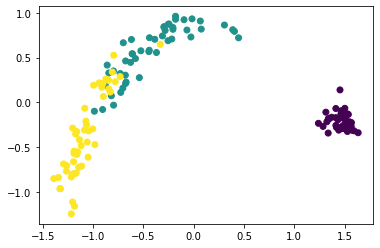

In [12]:
iris = load_iris()
mds = myMDS(2)
iris_ = mds.fit(iris.data)
plt.scatter(iris_[:,0], iris_[:,1], c = iris.target)
plt.show()

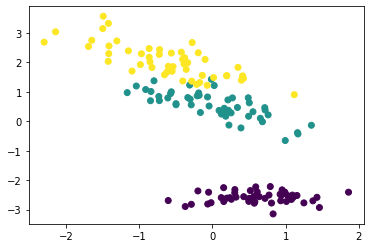

In [13]:
from sklearn.manifold import MDS
mds_ = MDS(2)
mds_.fit(iris.data)
_iris = mds_.fit_transform(iris.data)
plt.scatter(_iris[:,0], _iris[:,1], c = iris.target)
plt.show()